### IDs:
Insert yours IDs to the cell below

ID #1: 011996279

ID #2: 204735351


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from scipy.stats import binom, nbinom
import random
import statistics
from statistics import mean
from pylab import rcParams
from scipy.stats import multinomial
from scipy.stats import moment


### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.


$p =$ probability of defect

$P(\ge1) = 1-P(none)$

$ p(\ge1)=1-((1-p)^{n})$

$0.85=1-((1-0.03)^{n})$

$0.15=0.97^{n}\Longrightarrow n=\frac{log(0.15)}{log(0.97)}\thicksim62.3$

note: round up to next integer to make sure we're AT LEAST 85% and can't have partial samples

In [2]:
def samples_atleast_one(p_defect,p_atleast_one):
    n = math.ceil(math.log((1-p_atleast_one),2)/math.log((1-p_defect),2))
    return n

### Question 1A, 1B, and Sanity Checks

In [3]:
#Question 1A
print ("Samples req for 85% prob >= 1 defect in batch = ", samples_atleast_one(0.03,0.85), "\n")

#check Q1.A
defects_1a = binom.cdf(0,63,0.03)
print("Q1.A Answer check: Probability of at least 1 defect = ", round(1-defects_1a,3))

Samples req for 85% prob >= 1 defect in batch =  63 

Q1.A Answer check: Probability of at least 1 defect =  0.853


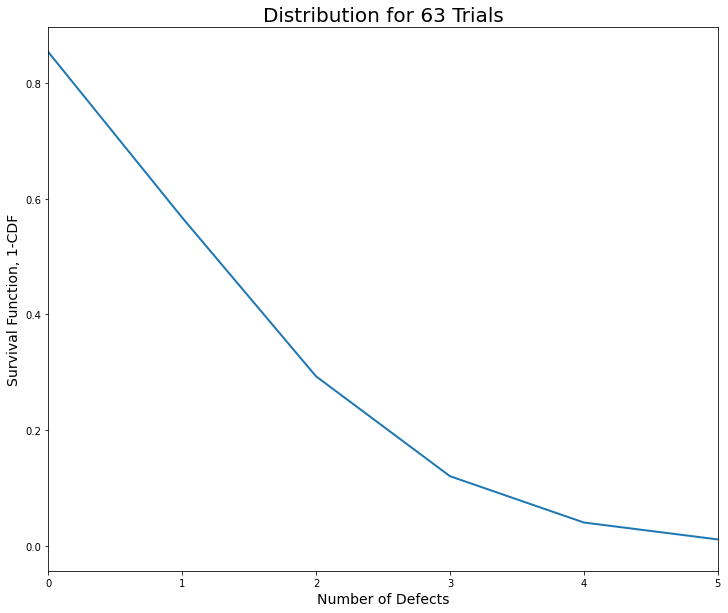

In [4]:
# Plotting Q1A
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x1a = np.arange(0, 63, 1)
ax.plot(x1a, binom.sf(x1a,63,0.03), lw=2)
ax.set_xlabel("Number of Defects", fontsize=14)
plt.xticks(np.arange(min(x1a), max(x1a)+1, 1))
plt.xlim(0,5)
ax.set_ylabel("Survival Function, 1-CDF", fontsize=14)
ax.set_title("Distribution for %i Trials" % 63, fontsize=20)

plt.show()

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
#Question 1B
print ("Samples req for 95% prob >= 1 defect in batch, 4% defect rate = ", samples_atleast_one(0.04,0.95), "\n")

#check Q1.B
defects_1b = binom.cdf(0,74,0.04)
print("Q1.B Answer check: probability of at least 1 defect = ", round(1-defects_1b,3))

Samples req for 95% prob >= 1 defect in batch, 4% defect rate =  74 

Q1.B Answer check: probability of at least 1 defect =  0.951


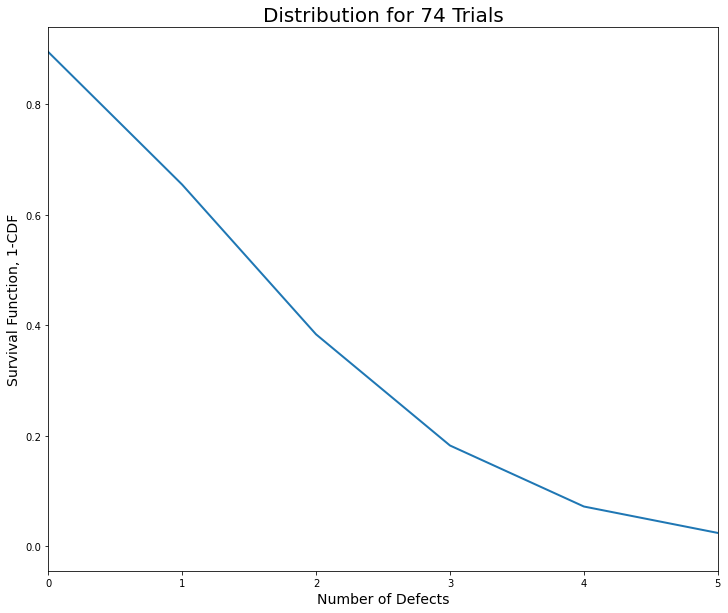

In [6]:
# Plotting Q1B
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x1b = np.arange(0, 74, 1)
ax.plot(x1b, binom.sf(x1b,74,0.03), lw=2)
ax.set_xlabel("Number of Defects", fontsize=14)
plt.xticks(np.arange(min(x1b), max(x1b)+1, 1))
plt.xlim(0,5)
ax.set_ylabel("Survival Function, 1-CDF", fontsize=14)
ax.set_title("Distribution for %i Trials" % 74, fontsize=20)

plt.show()

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [7]:
#Question 1.C.1
#shift right by r successes b/c nbinom yields # failures (non-defects), add r for total sample
defects_5 = int(nbinom.ppf(q=0.90, n=5, p=0.10, loc=5))
print("Samples req for 90% prob >= 5 defects in batch, 10% defect rate = ", defects_5, "\n")

#check Q1.C.1
defects_1c1 = binom.cdf(4,78,0.1)
print("Q1.C.1 Answer check: Probability of >= 5 defects @ 10% defective & 78 samples = ", round(1-defects_1c1,3))

Samples req for 90% prob >= 5 defects in batch, 10% defect rate =  78 

Q1.C.1 Answer check: Probability of >= 5 defects @ 10% defective & 78 samples =  0.901


In [8]:
#Question 1.C.2
defects_15 = int(nbinom.ppf(q=0.90, n=15, p=0.30, loc=15))
print("Samples req for 90% prob >= 15 defects in batch, 30% defect rate = ", defects_15, "\n")

#check Q1.C.2
defects_1c2 = binom.cdf(14,64,0.3)
print("Q1.C.2 Answer check: Probability of >= 15 defects @ 30% defective & 64 samples = ", round(1-defects_1c2,3))

Samples req for 90% prob >= 15 defects in batch, 30% defect rate =  64 

Q1.C.2 Answer check: Probability of >= 15 defects @ 30% defective & 64 samples =  0.903


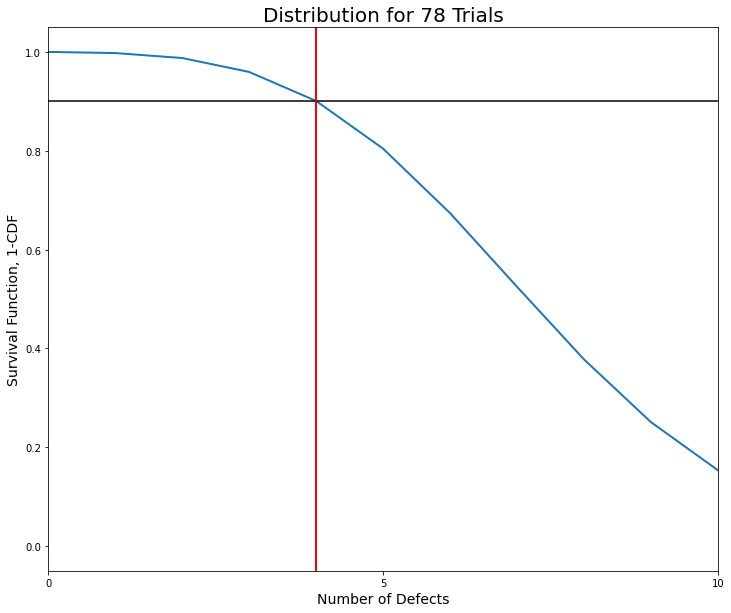

In [9]:
# Plot for Q1C.1
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
x = np.arange(0, defects_5+1, 1)
ax.plot(x, binom.sf(x,78,0.1), lw=2)
ax.set_xlabel("Number of Defects", fontsize=14)
plt.xticks(np.arange(min(x), max(x)+1, 5))
plt.xlim(0,10)
plt.axhline(y= 0.9, color='k')
plt.axvline(x= 4, linewidth=2, color='r')
ax.set_ylabel("Survival Function, 1-CDF", fontsize=14)
ax.set_title("Distribution for %i Trials" % defects_5, fontsize=20)

plt.show()

### Q1.C Explanation

1C.1 (10% defect rate, r=5) is a distribution with higher variance than 1C.2 (30% defect rate, r=15), with Var(1C.1) = 441 and Var (1C.2) = 100, which pushes a larger area of the Prob Mass Function to the two tails

Drawing from the Randomistan Basketball example in class, we also compare the upper and lower bounds of the two distributions, in a "race" to reaching 5 & 15 defects, respectively. As can be seen visually, and also with the bounds calculated below of [0.45, 0.45], P(X1C1 > X1C2) is <50%, meaning X1C2 is "better" than X1C1, i.e. it requires fewer samples to reach 15 defects than X1C1 requires to reach 5 defects. 


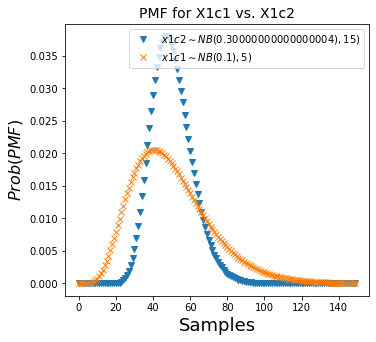

In [10]:

r = 5
p = 0.1
m = 3

x1c1 = nbinom (r,p,loc=r)
x1c2 = nbinom (r*m,p*m,loc=m*r)
i = range (0,int(np.round(3*r/p,0)))

p_x1c1_i = x1c1.pmf([xx for xx in i])
p_x1c2_i = x1c2.pmf([xx for xx in i])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_x1c2_i, 'v', label = "$x1c2\sim NB({{{0}}}),{{{1}}})$".format(p*m,r*m))
plt.plot(i,p_x1c1_i, 'x', label = "$x1c1\sim NB({{{0}}}),{{{1}}})$".format(p,r))
plt.xlabel("Samples",fontsize=18)
plt.ylabel('$Prob(PMF)$', fontsize=16)
plt.title("PMF for X1c1 vs. X1c2", fontsize=14)
plt.legend();


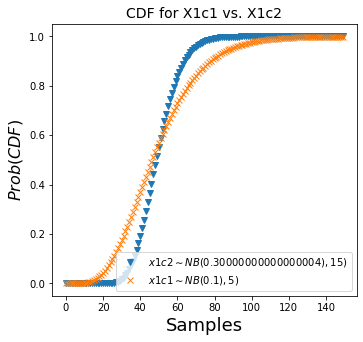

In [11]:
p_x1c1_ic = x1c1.cdf([xx for xx in i])
p_x1c2_ic = x1c2.cdf([xx for xx in i])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(i,p_x1c2_ic, 'v', label = "$x1c2\sim NB({{{0}}}),{{{1}}})$".format((p*m),r*m))
plt.plot(i,p_x1c1_ic, 'x', label = "$x1c1\sim NB({{{0}}}),{{{1}}})$".format(p,r))
plt.xlabel("Samples",fontsize=18)
plt.ylabel('$Prob(CDF)$', fontsize=16)
plt.title("CDF for X1c1 vs. X1c2", fontsize=14)
plt.legend();

In [12]:
print("Variance of Q1C.1 10% rate: ",int(x1c1.std())**2)
print("Variance of Q1C.2 30% rate: ", int(x1c2.std())**2)

Variance of Q1C.1 10% rate:  441
Variance of Q1C.2 30% rate:  100


P(x1c1>x1c2) ∈ [0.45,0.45] 


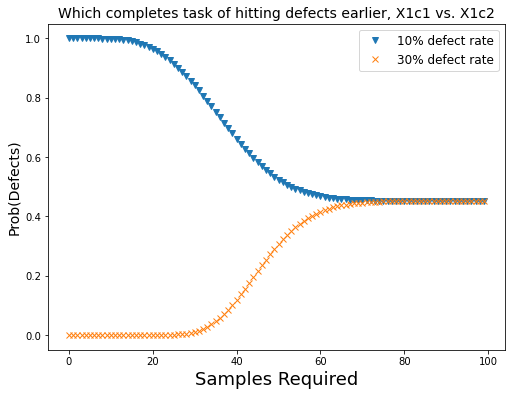

In [30]:
#calculating the asymptotic upper & lower bound of P(x1c1 > x1c2)
upper_bound = []
for i in range(0, 100):
    sum=0
    for j in range(5, i):
        sum+=x1c1.pmf(j)*(1-x1c2.cdf(j-1))
    upper_bound.append(1-sum)
lower_bound = []
for i in range(0, 100):
    sum=0
    for j in range(15, i):
        sum += x1c2.pmf(j)*(1-x1c1.cdf(j))
    lower_bound.append(sum)
    
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(0, 100), upper_bound,'v',label='10% defect rate')
plt.plot(range(0, 100),lower_bound,'x',label='30% defect rate')
plt.xlabel("Samples Required", fontsize = 18)
plt.ylabel("Prob(Defects)", fontsize = 14)
plt.legend(fontsize=12);
plt.title("Which completes task of hitting defects earlier, X1c1 vs. X1c2", fontsize=14)
print("P(x1c1>x1c2) ∈ [{},{}] ".format(round(lower_bound[-1],2),round(upper_bound[-1],2)))

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

Stochastic Heights - mean: 6299.68, median: 4600, iqr: 3702.09
Random Grove - mean: 4200.25, median: 4600, iqr: 4239.75


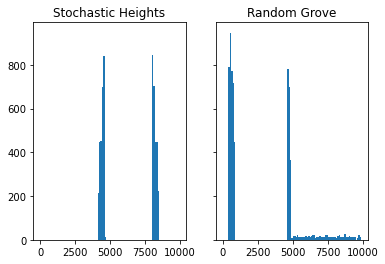

In [14]:
def dist_generator(median, mean, q1_range, iqr, q4_range, population, avg_people_household = 3):
    num_houses = int(population/avg_people_household)
    q_size = int(num_houses/4)
    q1 = [random.randint(median-int(iqr/2)-q1_range,median-int(iqr/2)) for i in range(q_size)]
    q2 = [random.randint(median-int(iqr/2),median) for i in range(q_size)]
    q3 = [random.randint(median,median+int(iqr/2)) for i in range(q_size)]
    q4 = [random.randint(median+int(iqr/2),median+int(iqr/2)+q4_range) for i in range(q_size)]
    
    h1 = sorted(q1+q2)
    h2 = sorted(q3+q4)
    dist = sorted(h1+[median]+h2)   
    
    diff_from_mean = mean - statistics.mean(dist)
    if diff_from_mean >= 0:
        h2 = [i+2*diff_from_mean for i in h2]
    else:
        h1 = [i+2*diff_from_mean for i in h1]
    dist = sorted(h1+[median]+h2)
    
    return dist, statistics.mean(dist), statistics.median(dist), np.subtract(*np.percentile(dist, [75, 25])), np.var(dist)


SH, sh_mean, sh_med, sh_iqr, sh_var= dist_generator(4600, 6300, 300, 300, 300, 16000)
RG, rg_mean, rg_med, rg_iqr, rg_var= dist_generator(4600, 4200, 200, 500, 12000, 22000)


print('Stochastic Heights' + ' - mean: ' + str(round(sh_mean,2)) + ', median: ' + str(round(sh_med,2)) + ', iqr: ' + str(round(sh_iqr,2)))
print('Random Grove' + ' - mean: ' + str(round(rg_mean,2)) + ', median: ' + str(round(rg_med,2)) + ', iqr: ' + str(round(rg_iqr,2)))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(SH, bins=[i*100 for i in range(0,100)])
ax1.set_title('Stochastic Heights')
ax2.set_title('Random Grove')
ax2.hist(RG, bins=[i*100 for i in range(0,100)])
plt.show()

Each call to dist_generator creates a new scenario, even with the same parameters:
Stochastic Heights - mean: 6299.68, median: 4600, iqr: 3699.85
Random Grove - mean: 4200.26, median: 4600, iqr: 4253.6


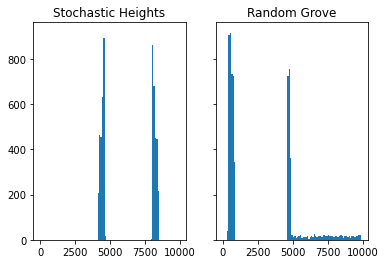

In [15]:
print('Each call to dist_generator creates a new scenario, even with the same parameters:')

SH, sh_mean, sh_med, sh_iqr, sh_var= dist_generator(4600, 6300, 300, 300, 300, 16000)
RG, rg_mean, rg_med, rg_iqr, rg_var= dist_generator(4600, 4200, 200, 500, 12000, 22000)


print('Stochastic Heights' + ' - mean: ' + str(round(sh_mean,2)) + ', median: ' + str(round(sh_med,2)) + ', iqr: ' + str(round(sh_iqr,2)))
print('Random Grove' + ' - mean: ' + str(round(rg_mean,2)) + ', median: ' + str(round(rg_med,2)) + ', iqr: ' + str(round(rg_iqr,2)))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(SH, bins=[i*100 for i in range(0,100)])
ax1.set_title('Stochastic Heights')
ax2.set_title('Random Grove')
ax2.hist(RG, bins=[i*100 for i in range(0,100)])
plt.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

Stochastic Heights - mean: 6300.15, median: 4600, iqr: 1663.07, var in millions: 31.9
Random Grove - mean: 4200.26, median: 4600, iqr: 4253.6, var in millions: 20.62


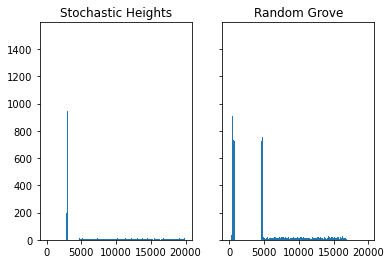

In [16]:
SH, sh_mean, sh_med, sh_iqr, sh_var= dist_generator(4600, 6300, 100, 100, 20000, 16000)

print('Stochastic Heights' + ' - mean: ' + str(round(sh_mean,2)) + ', median: ' + str(round(sh_med,2)) + ', iqr: ' + str(round(sh_iqr,2)) + ', var in millions: ' + str(round(sh_var/1000000,2)))
print('Random Grove' + ' - mean: ' + str(round(rg_mean,2)) + ', median: ' + str(round(rg_med,2)) + ', iqr: ' + str(round(rg_iqr,2))+ ', var in millions: ' + str(round(rg_var/1000000,2)))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(SH, bins=[i*100 for i in range(0,200)])
ax1.set_title('Stochastic Heights')
ax2.set_title('Random Grove')
ax2.hist(RG, bins=[i*100 for i in range(0,200)])
plt.show()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [17]:
avg_people_household = 3
RG_population = 22000
RG_houses = int(RG_population/avg_people_household)
RG = [200,400,500,1500,2000,4600,4600,4600,6000,6800,15000] * int(RG_houses/11)
rg_med = statistics.median(RG)
rg_mean = statistics.mean(RG)
rg_iqr = np.subtract(*np.percentile(RG, [75, 25]))
print('Random Grove' + ' - mean: ' + str(round(rg_mean,2)) + ', median: ' + str(round(rg_med,2)) + ', iqr: ' + str(round(rg_iqr,2)))

SH_population = 16000
SH_houses = int(RG_population/avg_people_household)
SH = [2150,2250,2300,2300,2500,4600,4600,4600,6000,18000,20000] * int(SH_houses/11)
sh_med = statistics.median(SH)
sh_mean = statistics.mean(SH)
sh_iqr = np.subtract(*np.percentile(SH, [75, 25]))
print('Stochastic Heights' + ' - mean: ' + str(round(sh_mean,2)) + ', median: ' + str(round(sh_med,2)) + ', iqr: ' + str(round(sh_iqr,2)))

Random Grove - mean: 4200, median: 4600.0, iqr: 5500.0
Stochastic Heights - mean: 6300, median: 4600.0, iqr: 3700.0


In [18]:
rg_phi = np.array([2350,3450,3400,8000,8000,8000,8500,8500,8900,16500,17900] * int(RG_houses/11))
rg_phi_med = statistics.median(rg_phi)
rg_phi_mean = statistics.mean(rg_phi)
print('Random Grove PHI' + ' - mean: ' + str(round(rg_phi_mean,2)) + ', median: ' + str(round(rg_phi_med,2)))

sh_phi = np.array([8000,8100,8150,8250,12000,12000,12000,12000,12000,20000,25000] * int(SH_houses/11))
sh_phi_med = statistics.median(sh_phi)
sh_phi_mean = statistics.mean(sh_phi)
print('Stochastic Heights PHI' + ' - mean: ' + str(round(sh_phi_mean,2)) + ', median: ' + str(round(sh_phi_med,2)))

exp_cov_sh = 0.97 * np.var(sh_phi)**0.5 * np.var(SH)**0.5
exp_cov_rg = 0.89 * np.var(rg_phi)**0.5 * np.var(RG)**0.5

cov_sh = np.cov(SH,sh_phi)[0,1]
cov_rg = np.cov(RG,rg_phi)[0,1]

print("Ratio for RG: ", round(cov_rg/exp_cov_rg,4), ", ratio for SH: ", round(cov_sh/exp_cov_sh,4))

Random Grove PHI - mean: 8500, median: 8000.0
Stochastic Heights PHI - mean: 12500, median: 12000.0
Ratio for RG:  1.0013 , ratio for SH:  0.9955


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

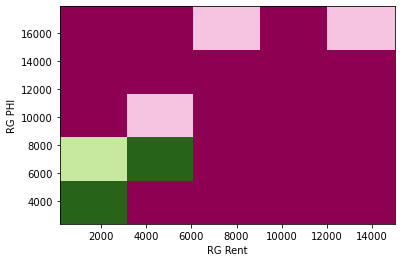

In [19]:
plt.hist2d(x=RG,y=rg_phi,cmap='PiYG',bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

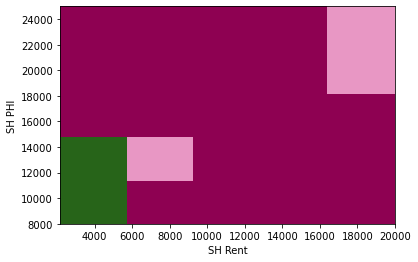

In [20]:
plt.hist2d(x=SH,y=sh_phi,cmap='PiYG',bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [23]:
XX = multinomial(20,[0.2,0.1,0.1,0.1,0.2,0.3])
Y_sample = XX.rvs(100)[:,1:4]


In [24]:
sums = Y_sample.sum(axis=1)
print("Array of all the Y observations = X2 + X3 + X4 : \n ", sums)
y_mean = sums.mean()
print ("\n Y sample mean : ", y_mean)

y3=moment(sums,moment=3)
print ("\n Empirical Centralized Third Moment of Y =  ", (round(y3,3)))

Array of all the Y observations = X2 + X3 + X4 : 
  [ 2  5  7  8  6  9  5  4  7  5  8  3  6  7  2  8  6 10  4  5  8  4  6  9
  6 10  3  7  7  3  6  8  6  4  5  4 10  5 10  8  5  5  3  5  6  7  9  4
  7  5  9  4  5  9  5  5  3  6  4  5 10  6  6  7  3  4  3  8  6  4  4  2
  4  8  6  7  8  4  3  3  8  5  8  7  4  5  2  7  3  5  7  3  7  6  6  9
  5  6  5  6]

 Y sample mean :  5.77

 Empirical Centralized Third Moment of Y =   1.926


In [25]:
y_third = ((sums - y_mean)**3).mean()
print ("Empirical Centralized Third Moment of Y =  ", round(y_third,3))

Empirical Centralized Third Moment of Y =   1.926


### Question 3.4 - Multinomial Distributions

4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

 Empirical Formula for Centralized Third Moment of Y, $\gamma_{3}$ : 
$$\gamma_{3}={\displaystyle \frac{1}{n}}{\displaystyle \sum_{i=1}^{n}}(Y_{i}-\mu)^{3}$$

 Theoretical Formula for Centralized Third Moment of Y, $\gamma_{3}$ : 
 $$\gamma_{3}=n\times p (1-p)(1-2p)=20\times0.3 (1-0.3)(1-2*0.3)=1.68 $$
 
Y is an experiment with 100 trials, which is not enough to converge asymptotically towards 
the theoretical centralized third moment, and thus generates random $\gamma_{3}$ values ranging from negative to  positive, whereas in the example below for 1,000,000 trials, $\gamma_{3}$  converges towards the theoretical value of $1.68$, with a narrow range of $\sim 1.65-1.70$

the distribution of Y and its empirical third moment is also affected because Y is a binomial distribution, pulling its values from sum of $X_{2}-X_{4}$, with $X\sim multinom$, and its variables $X_{1}-X_{6}$ are collectively dependent

In [26]:
Y_repeat = XX.rvs(1000000)[:,1:4]
sums_repeat = Y_repeat.sum(axis=1)
y3r=moment(sums_repeat,moment=3)
print ("Empirical Centralized Third Moment of Y =  ", round(y3r,3))

Empirical Centralized Third Moment of Y =   1.687


### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

**Q3.1** What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables?

$$let Y+Z=YZ,Var(X+Y+Z)=Var(X+YZ)=Var(X)+Var(YZ)+2COV(X,YZ)$$

$$Var(YZ)=Var(Y+Z)=Var(Y)+Var(Z)+2COV(Y,Z)$$

So we have $$\Longrightarrow Var(X)+Var(Y)+Var(Z)+2COV(Y,Z)+2COV(X,YZ)$$

to solve, with the help of linearity of expectations, for $COV(X,YZ)$ , or 

$$COV(X,Y+Z)=E(X(Y+Z))-E(X)E(Y+Z)=E(XY)+E(XZ)-E(X)E(Y)-E(X)E(Z)$$

$$=\{E(XY)-E(X)E(Y)\}+\{E(XZ)-E(X)E(Z)\}=COV(X,Y)+COV(X,Z)$$

and therefore, we're left with $\Longrightarrow$ $$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)+2COV(X,Y)+2COV(X,Z)+2COV(Y,Z)$$

more generally, $$Var(\sum_{i=1}^{n}X_{i})=\sum_{i=1}^{n}Var(X_{i})+2COV(\frac{n(n-1)}{2}combinations)$$

**Q3.2** What happens if X,Y,Z are pairwise independent?

If $X,Y,Z$ are pairwise independent, then $COV (X,Y) = COV (Y,Z) = COV (X,Z) = 0$ , and 

$Var (X + Y + Z) = Var(X) + Var(Y) + Var(Z)$

**Q3.3** If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer 

no, the example covered in class, rolling a dice 20 times with $X_{1}...X_{6}$ = number of times dice landed on each number. If the dice are pairwise independent (i.e. any outcome other than rolling 20 1's), they can be and still are collectively **dependent**, because if we roll 10 1's, we can't roll more than 10 total 2's-6's, or if we know $X_{1}-X_{5}$, then we'll know $X_{6}$ with certainty. However, if the variables are **collectively independent**, then we **CAN** infer that they're also **pairwise independent**, since collective independence is the stronger more general independence, and implies pairwise independence...just not the other way around! 

a more formal example is presented below: consider a lottery ball drawn randomly from the numbers {1,2,3,4}. 

A = 1 or 2 is drawn, A = {1,2}<br>
B = 1 or 3 is drawn, B = {1,3}<br>
C = 1 or 4 is drawn, C = {1,4}

$P(A\cap B)=P(A)P(B)=\frac{1}{2}*\frac{1}{2}=\frac{1}{4}=P(A\cap C)=P(B\cap C)\Longrightarrow $ pairwise independent

however, the events are **NOT** collectively or mutually independent, as proven below: 

$P(A\cap B\cap C)=$probability of drawing a 1$=\frac{1}{4}\neq P(A)P(B)P(C)=\frac{1}{2}*\frac{1}{2}*\frac{1}{2}=\frac{1}{8}\Longrightarrow$ therefore **NOT** collectively independent

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [31]:
from scipy.stats import rv_discrete

def NFoldConv(P, n):
    if n == 0:
        return []
    if n == 1:
        return P
    Q = P
    for k in range(2, n+1):
        pk = []
        min_sum = Q.support()[0] + P.support()[0]
        max_sum = Q.support()[1] + P.support()[1]
        for i in range(min_sum, max_sum+1):
            cum_prob = 0
            for j in range(i):
                cum_prob += (Q.pmf(j)*P.pmf(i-j))
            pk.append(cum_prob)
        Q = rv_discrete(values=(range(min_sum,max_sum+1),pk))
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [32]:
xk = np.arange(1,9)
pk = [1/8]*8
P = rv_discrete(values=(xk, pk))

Q = NFoldConv(P, 17)
print(Q.xk)
print(Q.pk)

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136]
[4.44089210e-16 7.54951657e-15 6.79456491e-14 4.30322444e-13
 2.15161222e-12 9.03677133e-12 3.31348282e-11 1.08871578e-10
 3.26607186e-10 9.07134812e-10 2.35772912e-09 5.78267301e-09
 1.34733957e-08 2.99840073e-08 6.40173488e-08 1.31615841e-07
 2.61380925e-07 5.02742224e-07 9.38663699e-07 1.70459936e-06
 3.01597023e-06 5.20688185e-06 8.78316811e-06 1.44930374e-05
 2.34184931e-05 3.70901651e-05 5.76270894e-05 8.79011761e-05
 1.31723541e-04 1.94046516e-04 2.81171100e-04 4.00945025e-04
 5.62931924e-04 7.785276